<a href="https://colab.research.google.com/github/NehaGupta-DataScientists/AirbnbBookingAnalysis-/blob/main/My_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project By** : Neha Gupta

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#  **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import statistics
from collections import Counter



# **Acquaring And loading File**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_frame = pd.read_csv("/content/drive/MyDrive/Airbnb NYC 2019.csv")


# **Recognizing Data**

In [4]:
# To get an overview of the given dataset how it looks like. 

data_frame.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# To check no. of rows in the given dataset.

len(data_frame)

48895

In [6]:
# checking no.of rows and columns in the given dataset

data_frame.shape

(48895, 16)

* Total rows = 48895
* total columns = 16

In [7]:
# size of dataset 
data_frame.size

782320

* Total Size = 782320

In [8]:
# Displaying the column names along with their type 

data_frame.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
# To check data types and non-null count values  of the all the columns with thier Range index and also display memory usage.

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

  The columns with missing values are  Name, Host_name, Last_review , and       Reviews_per_month because these are having non-null count less than 48895 (dataframe).

In [10]:
# To return the statistical summary of the dataframe like percentage,count , mean ,std, min , max

data_frame.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* Min of Price is 0.

* max is 10000.

* Mean price is 152.

* On an average people stay 7 days in a room.

In [10]:
# No. of null values in all columns 

data_frame.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

* maximum null values are (10052) in  last_review  & reviews_per_month  columns

In [35]:
print(data_frame.columns)
print(len(data_frame.columns))

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
16


* Total columns=16


**Data Cleaning**




In [36]:
#checking the Duplicates data
data_frame.duplicated().sum()

0

We have not seen any duplicate values. Let's check nan value.

In [37]:
#checking null values by using 'sum' function to show , how many nulls are found in each column in dataset
data_frame.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

* columns name, host_name, last_review, and reviews_per_month are having null Values
* last_review and reviews_per_month are missing over 10,000 rows of data each.

* To deal with number_of_reviews column , we need to replace all NaN values with zeros

*  'name','host_name','last_review' columns will not be used in this analysis and should be dropped.

Removing redundant Columns



In [38]:
#dropping columns that are not important for our future data exploration and predictions
data_frame.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [39]:
# Examining Changes after column dropping
print("updated shape:", data_frame.shape)
data_frame.head()

updated shape: (48895, 12)


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# **Data Handling**

**Dealing with missing values**



In [41]:
#replacing all NaN values in column 'reviews_per_month' with zero
data_frame.fillna({'reviews_per_month':0}, inplace=True)

In [43]:
#examing changes
data_frame.reviews_per_month.isnull().sum()

0

**Let's find zeros values**

In [44]:
(data_frame== 0).sum()


host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

* if people did not give any review ,number_of_reviews and reviews_per_month can be zero,
*price can be also zero for promoting some new airbnb.

* Now, we observe that the availabilities of the dataframe are  0 days in some rows .  It is allowed the number of reviews on these rows have values , which means the airbnb has been reviewed even withouth somebody staying in there. hence, these values have to drop from the list.

Dealing with invalid Data

In [45]:
for i in range(len(data_frame)):
 if data_frame.availability_365[i]==0 and data_frame.number_of_reviews[i]!=0: 
  data_frame.drop([i], inplace= True)

In [46]:
#examing changes
data_frame.shape

(36207, 12)

* After data handling , we have got 36207 columns and 12 rows 

In [48]:
# After Data Handling, Dataframe is shown as below.
data_frame.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


# **Data Exploration**

In [47]:
# To Display the statistical summary like percentage, count, mean, max ,min std , after cleaning Data 
data_frame.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.620700e+04,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000
mean,7.627096e+07,40.728764,-73.950054,161.832491,7.955561,27.590079,1.307588,9.156185,152.303229
std,8.393650e+07,0.055803,0.049606,254.232662,22.787553,49.266153,1.735645,38.042091,131.818455
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.618096e+06,40.689220,-73.983240,70.000000,1.000000,0.000000,0.000000,1.000000,21.000000
50%,3.681609e+07,40.723890,-73.954760,110.000000,3.000000,6.000000,0.610000,1.000000,125.000000
75%,1.316910e+08,40.763180,-73.932070,187.000000,5.000000,32.000000,2.030000,3.000000,283.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


At first glance, the summary statistics shows us that

* the average price is 161.83,
* the average minimum nights stay is 7.95 nights,
* the average number of reviews is 27.59 per listing,
* a host has an average of 9.15 places listed and
* availability averages 152.30 vacant days per year.

 *Most importantly, the min price is showing as zero and the max price as 10,000. Something isn't right with the data, so need to look into this issue and check for outliers*.

# **Data Visulization**

**Let's Discuss about all the above columns of the Dataframe**

---



**Which hosts are the busiest and why?**


**1.Host_id Column**

In [49]:
# How many host listings are there?
data_frame.host_id.nunique()


26388

In [62]:
#let's see what hosts (IDs) have the most listings on Airbnb platform dataset
top_five_host=data_frame.host_id.value_counts().head(5)
top_five_host

219517861    327
107434423    232
30283594     121
137358866     98
12243051      96
Name: host_id, dtype: int64

In [63]:
top_host_df=pd.DataFrame(top_five_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'host_id', 'host_id':'P_Count'}, inplace=True)
top_host_df

,host_id,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,98
4,12243051,96


[Text(0, 0, '12243051'),
 Text(0, 0, '30283594'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '219517861')]

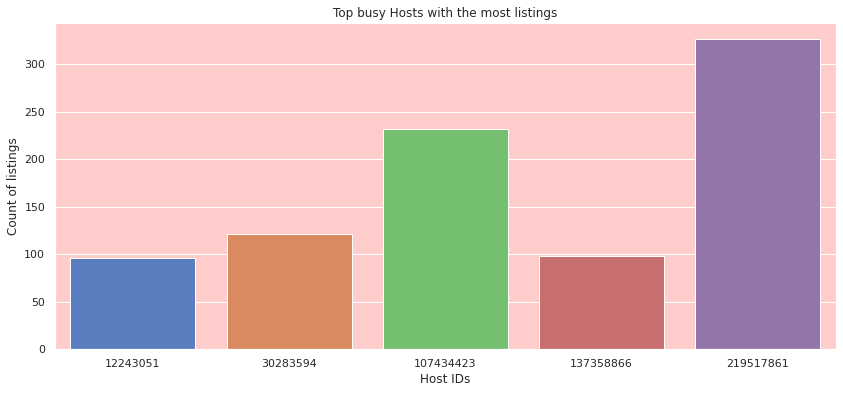

In [64]:
plt.figure(figsize=(14,6))
ax = plt.axes()
ax.set_facecolor("#ffcccc")
viz_1=sns.barplot(x="host_id", y="P_Count", data=top_host_df, palette='muted')
viz_1.set_title('Top busy Hosts with the most listings')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=0)

host id 219517861 is having highest no of listing, so we can say that it is busiest host.

**What can we learn about different hosts and areas?**

**2.neighbourhood_group Column**

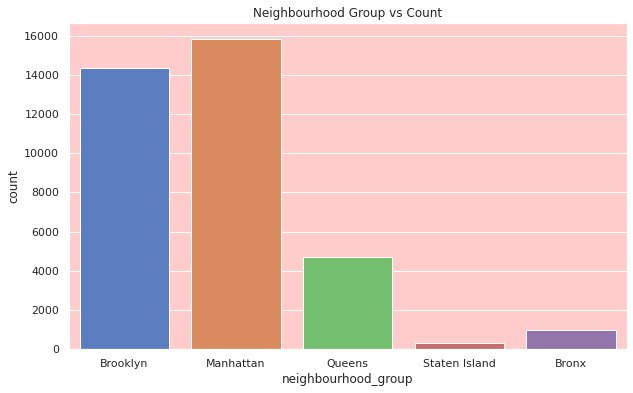

In [59]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("#ffcccc")
plt.title("Neighbourhood Group vs Count")
sns.countplot(x=data_frame.neighbourhood_group,palette="muted")
plt.ioff()

Manhattan is having highest no of booking so Manhattan is most preffered area.

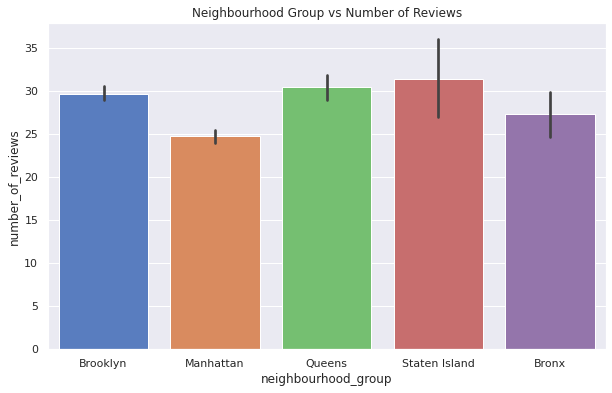

In [61]:
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group vs Number of Reviews")
sns.barplot(x=data_frame.neighbourhood_group, y=data_frame.number_of_reviews,palette="muted") 
plt.show()


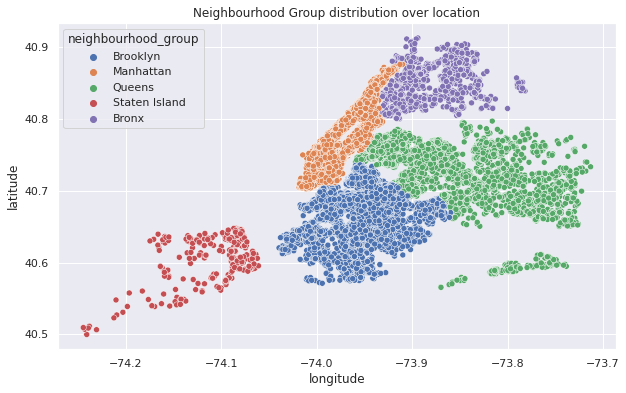

In [66]:
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group distribution over location")
sns.scatterplot(x=data_frame.longitude,y=data_frame.latitude,hue=data_frame.neighbourhood_group)
plt.ioff()

**Room_type Column**

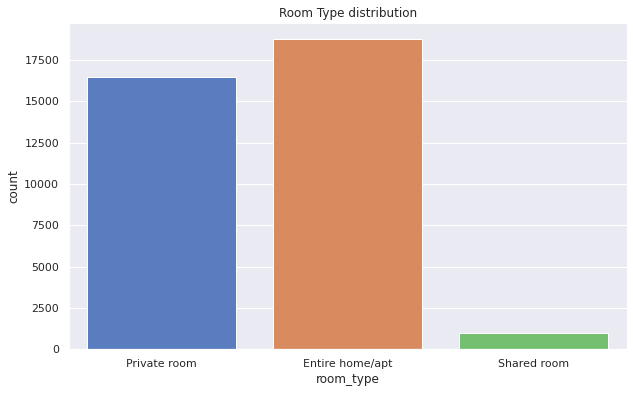

In [67]:
plt.figure(figsize=(10,6))
plt.title("Room Type distribution")
sns.countplot(x=data_frame.room_type,palette="muted")
plt.ioff()

In [80]:
abc=data_frame.groupby(['neighbourhood_group']).room_type.value_counts()
abc.head(15)

neighbourhood_group  room_type      
Bronx                Private room        574
                     Entire home/apt     343
                     Shared room          54
Brooklyn             Private room       7152
                     Entire home/apt    6821
                     Shared room         348
Manhattan            Entire home/apt    9763
                     Private room       5688
                     Shared room         391
Queens               Private room       2851
                     Entire home/apt    1698
                     Shared room         178
Staten Island        Private room        177
                     Entire home/apt     161
                     Shared room           8
Name: room_type, dtype: int64

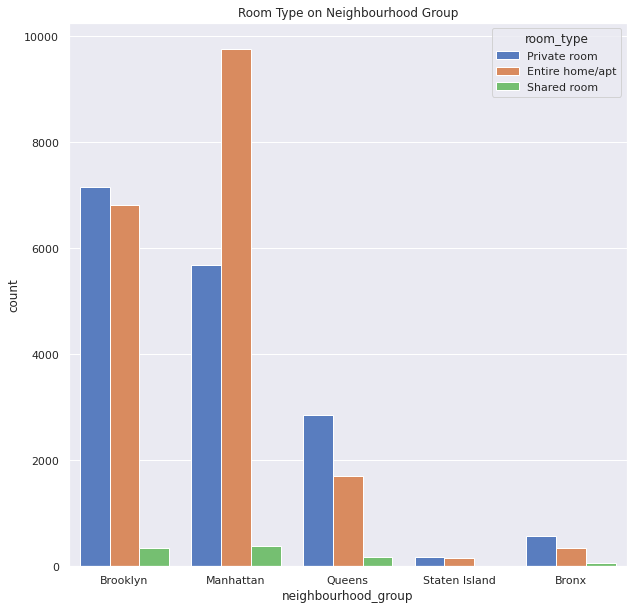

In [85]:
plt.figure(figsize=(10,10))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x=data_frame.neighbourhood_group,hue=data_frame.room_type, palette="muted")
plt.show()


**What can we learn from predictions? (ex: locations, prices, reviews, etc)**

Get Correlation between different variables

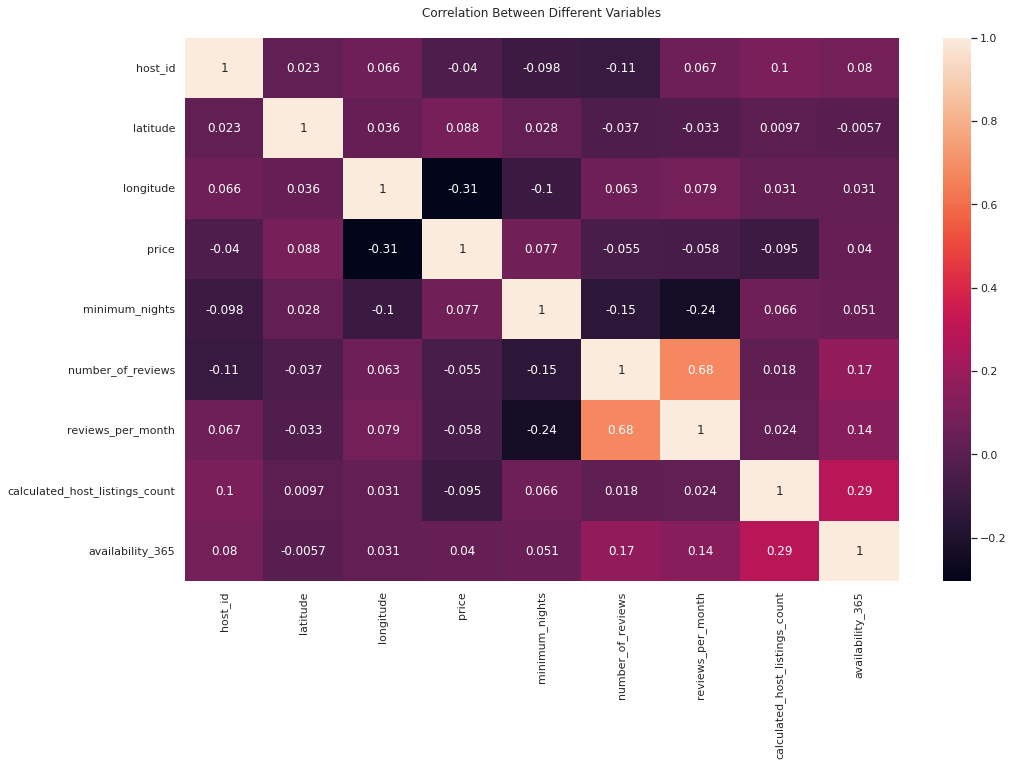

In [86]:
corr = data_frame.corr(method='kendall')
plt.figure(figsize=(16,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

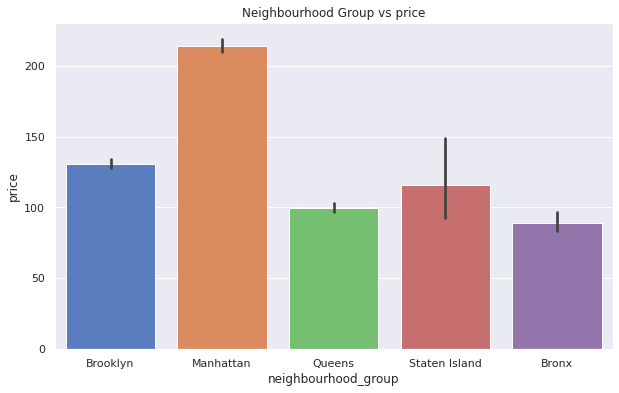

In [88]:
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group vs price")
sns.barplot(x=data_frame.neighbourhood_group, y=data_frame.price,palette="muted") 
plt.show()

Minimum_nights Column


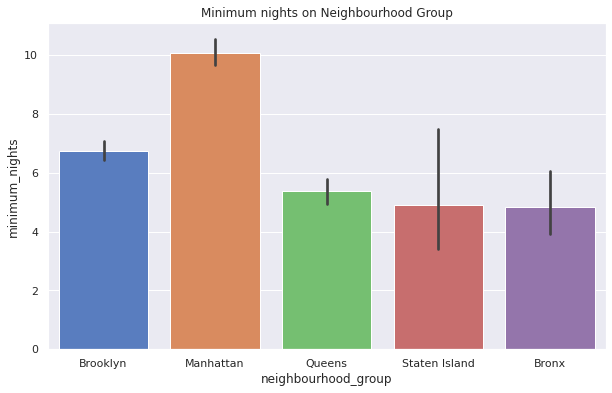

In [90]:
plt.figure(figsize=(10,6))
plt.title("Minimum nights on Neighbourhood Group")
sns.barplot(x=data_frame.neighbourhood_group, y=data_frame.minimum_nights,palette="muted") 
plt.show()

In [95]:
# To return the statistical summary of Number_of_reviews in the dataframe like percentage,count , mean ,std, min , max

data_frame[['number_of_reviews']].describe()

,price
count,36207.000000
mean,161.832491
std,254.232662
min,0.000000
25%,70.000000
50%,110.000000
75%,187.000000
max,10000.000000


In [103]:
data_frame[['number_of_reviews']].value_counts()

number_of_reviews
0                    10052
1                     2429
2                     1639
3                     1264
4                     1090
                     ...  
341                      1
340                      1
339                      1
335                      1
629                      1
Length: 388, dtype: int64

* **Column Name-:** number_of_reviews, Length: 388, dtype: int64




In [13]:
# To return the statistical summary of Number_of_reviews in the dataframe like percentage,count , mean ,std, min , max

data_frame[['number_of_reviews']].describe()

,number_of_reviews
count,48895.000000
mean,23.274466
std,44.550582
min,0.000000
25%,1.000000
50%,5.000000
75%,24.000000
max,629.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'number_of_reviews')

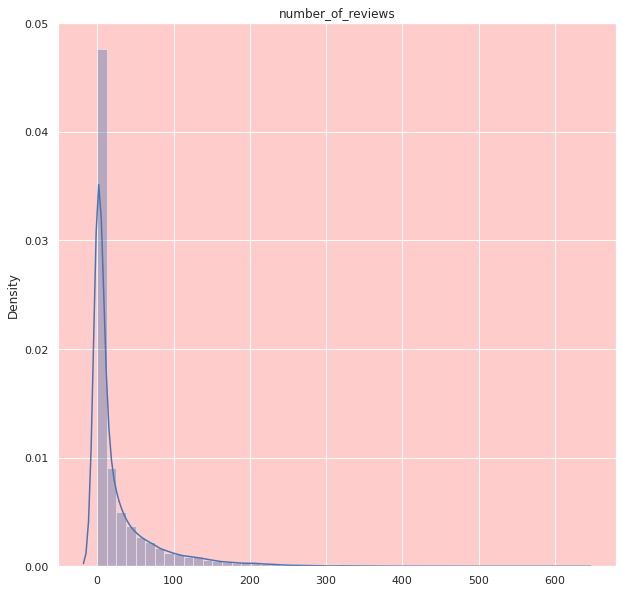

In [100]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_facecolor("#ffcccc")

ax = sns.distplot(x=data_frame['number_of_reviews'])
plt.title('number_of_reviews')



 **Observation**
 * Number_of_reviews 0 to 100 are comparetively highly dense 
 * Average rating is approx 23 
 * Maximum Number_of_reviews is 629



# **Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

**Density and distribution of prices of neighberhood_group**


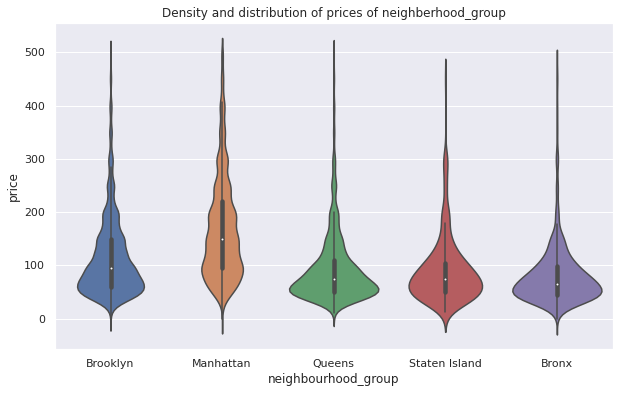

In [101]:
plt.figure(figsize=(10,6))
plt.title("Density and distribution of prices of neighberhood_group")
subset_df=data_frame[data_frame.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=subset_df, x='neighbourhood_group', y='price')

* with a violin plot we can definitely observe a couple of things about distribution and density of prices for Airbnb in NYC Groups. 
 First, we can state that Manhattan has the highest range of prices for the listings with 150 price as average observation, followed by Brooklyn with $90 per night. Queens and Staten Island appear to have  very similar distributions, Bronx is the cheapest of them all.

* This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

* The Manhattan group has the highest no of listing due to some factor.

* Manhattan has the highest booking of type Entire Home/Apartment.
* Manhattan has the highest minimum_nights count.
* Manhattan has a higher range of prices compared to the other.

   So people who want to stay long, book Entire Home/Apartment and due to higher range of prices, people can get affordable booking with higer standard of living